# Tracking COVID-19 

## Basic code and data

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
# This gets the data from John Hopkins university -- it is online in github

header = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
global_confirmed = pd.read_csv(header + "time_series_covid19_confirmed_global.csv")
global_deaths = pd.read_csv(header + "time_series_covid19_deaths_global.csv")
us_deaths = pd.read_csv(header + "time_series_covid19_deaths_US.csv")
us_confirmed = pd.read_csv(header + "time_series_covid19_confirmed_US.csv")

In [283]:
def to_timeseries(s):
    s.index = pd.DatetimeIndex(s.index)
    return s 
    
def diff_clip(s):
    return s.diff().clip(lower=0.0, upper=None) # clip out negative observations
    
# Some functions to plot the data by county, state and country

def plot_county(county, state):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,4])

    ts1 = us_deaths[(us_deaths["Province_State"] == state) & (us_deaths["Admin2"] == county) ].iloc[:, 12:].sum()
    ts1 = diff_clip(to_timeseries(ts1))
    
    ts2 = us_confirmed[(us_confirmed["Province_State"] == state) & (us_confirmed["Admin2"] == county) ].iloc[:, 11:].sum()
    ts2 = diff_clip(to_timeseries(ts2))
    
    ts1.plot.area(ax = axes[0], title = county + ", " + state + ", Deaths", alpha=.7)
    ts2.plot.area(ax = axes[1], title = county + ", " + state + ", Confirmed", alpha=.7)
    
    
def plot_state(state):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,4])

    ts1 = us_deaths[(us_deaths["Province_State"] == state)].iloc[:, 12:].sum()
    ts1 = diff_clip(to_timeseries(ts1))

    ts2 = us_confirmed[(us_confirmed["Province_State"] == state)].iloc[:, 11:].sum()
    ts2 = diff_clip(to_timeseries(ts2))
    
    ts1.plot.area(ax = axes[0], title =  state + ", Deaths", alpha=0.7)
    ts2.plot.area(ax = axes[1], title = state + ", Confirmed", alpha=0.7)
    
    
def plot_global(name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,4])

    ts1 = global_deaths[global_deaths["Country/Region"] == name].iloc[:, 6:].sum()
    ts1 = diff_clip(to_timeseries(ts1))
    
    ts2 = global_confirmed[global_confirmed["Country/Region"] == name].iloc[:, 6:].sum()
    ts2 = diff_clip(to_timeseries(ts2))
    
    ts1.plot.area(ax = axes[0], title = name + ", Deaths", alpha=0.7)
    ts2.plot.area(ax = axes[1], title = name + ", Confirmed", alpha=0.7)
    
    
def plot_global_list(ls):
    for country in ls:
        plot_global(country);

## Plots 

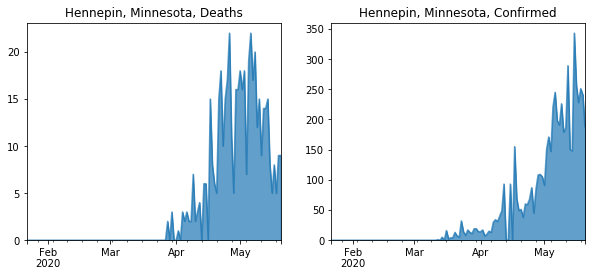

In [284]:
plot_county("Hennepin", "Minnesota")

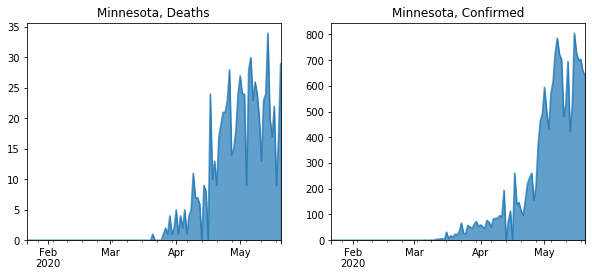

In [242]:
plot_state("Minnesota")

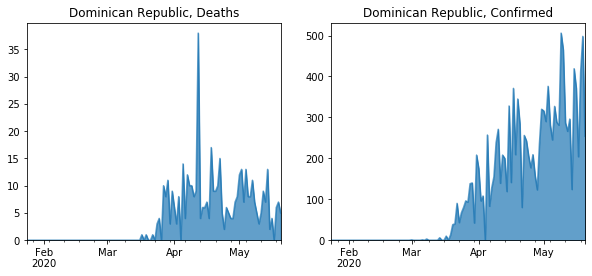

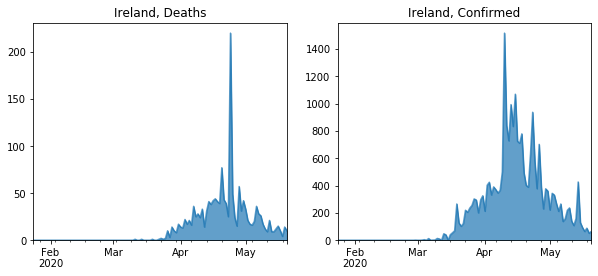

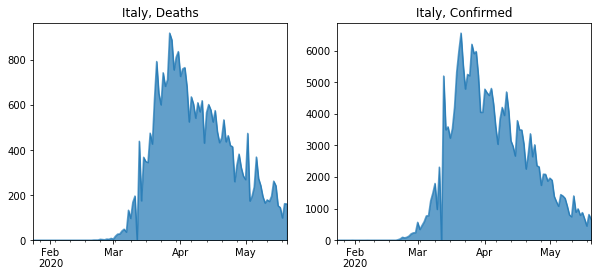

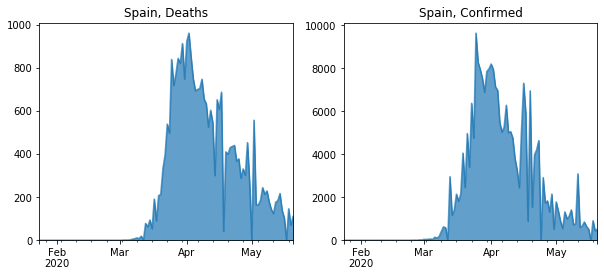

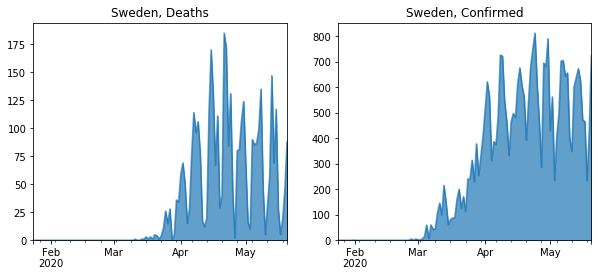

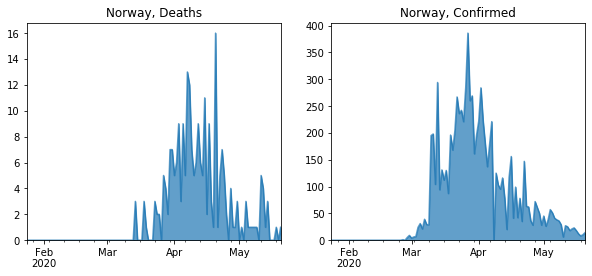

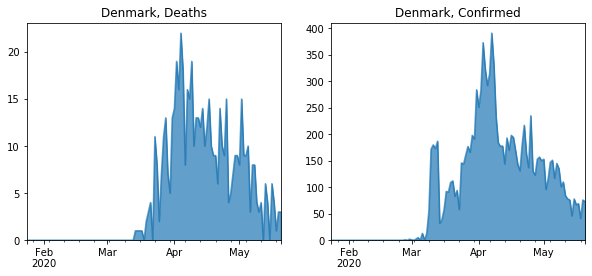

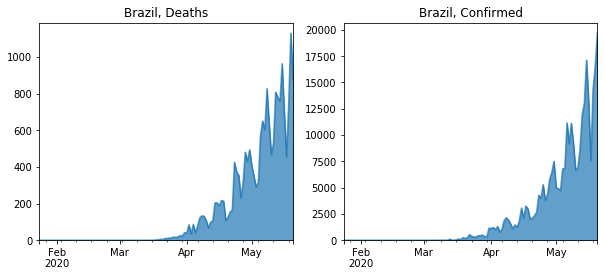

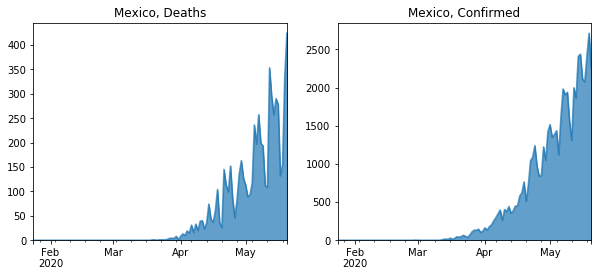

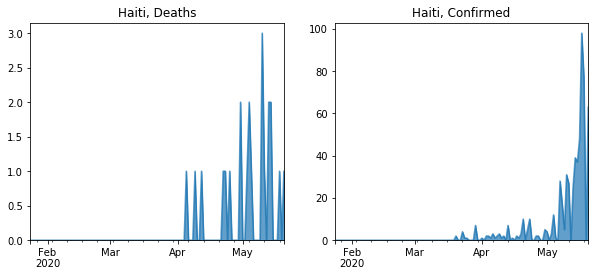

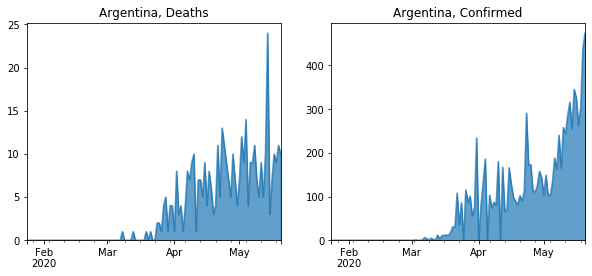

In [266]:
plot_global_list(["Dominican Republic", "Ireland", "Italy", "Spain", "Sweden", "Norway", "Denmark", "Brazil", "Mexico", "Haiti", "Argentina"])